In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
spray_df = pd.read_csv('./data/spray.csv')

In [3]:
spray_df.head()

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858


In [4]:
weather_df = pd.read_csv('./data/weather.csv')

In [5]:
weather_df.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,...,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9


In [6]:
weather_df.columns.to_list()

['Station',
 'Date',
 'Tmax',
 'Tmin',
 'Tavg',
 'Depart',
 'DewPoint',
 'WetBulb',
 'Heat',
 'Cool',
 'Sunrise',
 'Sunset',
 'CodeSum',
 'Depth',
 'Water1',
 'SnowFall',
 'PrecipTotal',
 'StnPressure',
 'SeaLevel',
 'ResultSpeed',
 'ResultDir',
 'AvgSpeed']

In [7]:
train_df = pd.read_csv('./data/train.csv')

In [8]:
train_df.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0


In [9]:
train_df['WnvPresent'].value_counts()

0    9955
1     551
Name: WnvPresent, dtype: int64

In [10]:
spray_df['Date'] = pd.to_datetime(spray_df['Date'])
train_df['Date'] = pd.to_datetime(train_df['Date'])
weather_df['Date'] = pd.to_datetime(weather_df['Date'])

In [11]:
# Group by species and sum the WnvPresent column to see which species has the highest WNV presence
species_wnv = train_df.groupby('Species')['WnvPresent'].sum().sort_values(ascending=False)

# Group by address and sum the WnvPresent column to see which locations have the highest WNV presence
locations_wnv = train_df.groupby('Address')['WnvPresent'].sum().sort_values(ascending=False)

species_wnv, locations_wnv.head(10)

(Species
 CULEX PIPIENS/RESTUANS    262
 CULEX PIPIENS             240
 CULEX RESTUANS             49
 CULEX ERRATICUS             0
 CULEX SALINARIUS            0
 CULEX TARSALIS              0
 CULEX TERRITANS             0
 Name: WnvPresent, dtype: int64,
 Address
 ORD Terminal 5, O'Hare International Airport, Chicago, IL 60666, USA    66
 South Doty Avenue, Chicago, IL, USA                                     41
 4100 North Oak Park Avenue, Chicago, IL 60634, USA                      18
 South Stony Island Avenue, Chicago, IL, USA                             16
 4600 Milwaukee Avenue, Chicago, IL 60630, USA                           14
 8200 South Kostner Avenue, Chicago, IL 60652, USA                       11
 3600 North Pittsburgh Avenue, Chicago, IL 60634, USA                    11
 2400 East 105th Street, Chicago, IL 60617, USA                          11
 6100 West Fullerton Avenue, Chicago, IL 60639, USA                      10
 Ohare Court, Bensenville, IL 60106, USA        

# Mosquito Species and WNV Presence

- **Culex Pipiens/Restuans**: Found with the West Nile Virus (WNV) 262 times.
- **Culex Pipiens**: 240 instances of WNV.
- **Culex Restuans**: 49 instances of WNV.
- **Other species**: Culex Erraticus, Culex Salinarius, Culex Tarsalis, and Culex Territans have not been found with WNV.

## Top Locations with WNV Presence

1. **ORD Terminal 5, O'Hare International Airport, Chicago**: 66 instances.
2. **South Doty Avenue, Chicago**: 41 instances.
3. **4100 North Oak Park Avenue, Chicago**: 18 instances.
4. **South Stony Island Avenue, Chicago**: 16 instances.
5. **4600 Milwaukee Avenue, Chicago**: 14 instances.

> Note: Several other locations have between 10-11 instances.

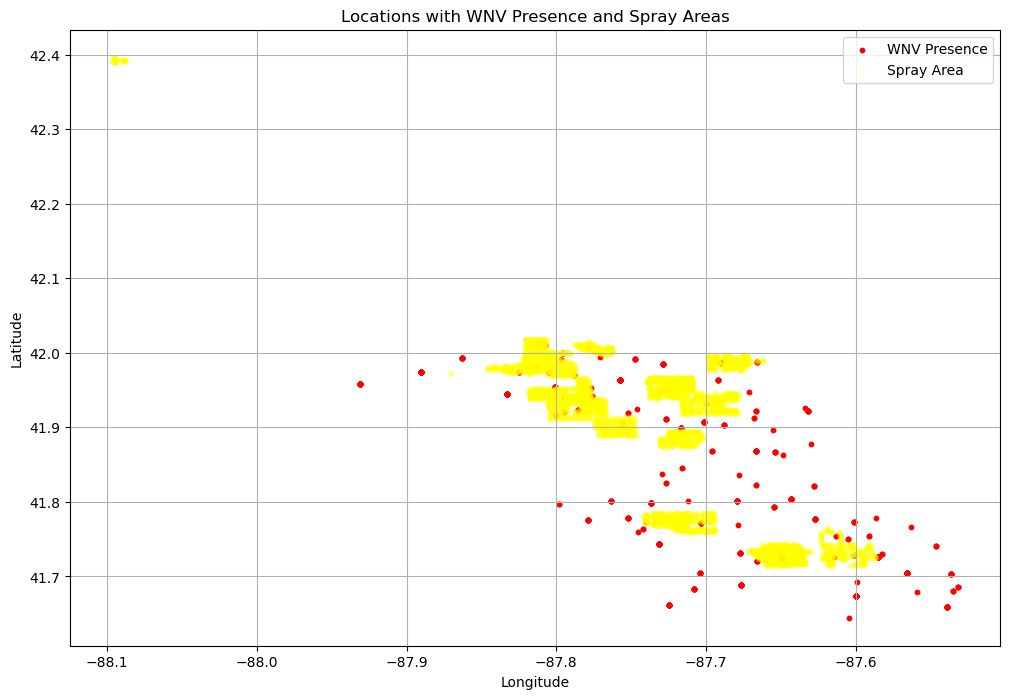

In [45]:
# Filter the dataset to include only rows where WnvPresent is 1
wnv_present_df = train_df[train_df['WnvPresent'] == 1]

# Plotting
plt.figure(figsize=(12, 8))

# Plot locations with WNV presence
plt.scatter(wnv_present_df['Longitude'], wnv_present_df['Latitude'], c='red', s=10, label='WNV Presence')

# Plot spray locations
plt.scatter(spray_df['Longitude'], spray_df['Latitude'], c='yellow', s=10, alpha=0.1, label='Spray Area')

plt.title("Locations with WNV Presence and Spray Areas")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.grid(True)
plt.show()

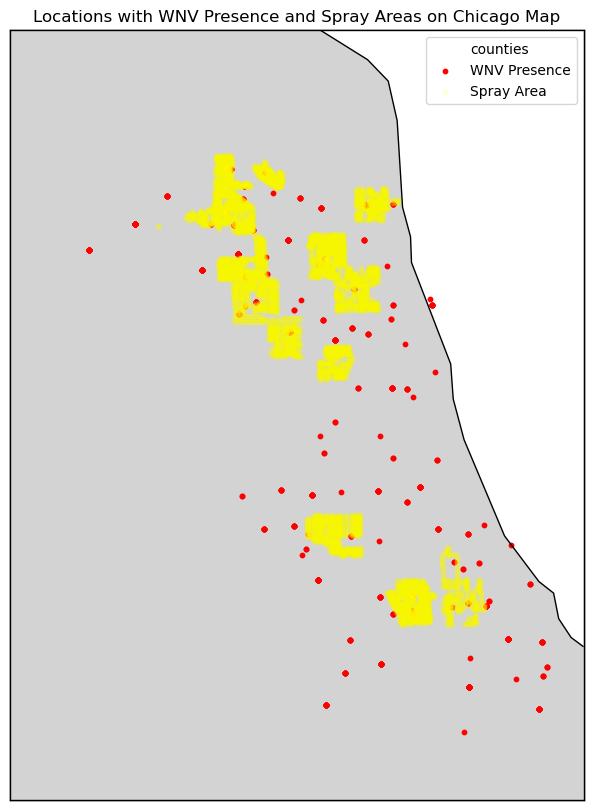

In [47]:
from mpl_toolkits.basemap import Basemap

# Create a figure and axis with desired dimensions
fig, ax = plt.subplots(figsize=(10,10))

# Define the boundaries for Chicago
ll_lon, ll_lat = -88.0, 41.6
ur_lon, ur_lat = -87.5, 42.1
    
# Create a Basemap object for Chicago
m = Basemap(projection='merc', llcrnrlat=ll_lat, urcrnrlat=ur_lat, 
            llcrnrlon=ll_lon, urcrnrlon=ur_lon, lat_ts=41.5, resolution='h', ax=ax)

m.drawcounties(color='white')   # Draw counties
m.drawrivers(color='blue')      # Draw rivers
m.drawcoastlines()              # Draw coastlines
m.fillcontinents(color='lightgray')   # Fill continents with a color
m.drawmapboundary()             # Draw the map boundary

# Convert latitude and longitude to x and y coordinates
x_wnv, y_wnv = m(wnv_present_df['Longitude'].values, wnv_present_df['Latitude'].values)
x_spray, y_spray = m(spray_df['Longitude'].values, spray_df['Latitude'].values)

# Plot the data on the map
ax.scatter(x_wnv, y_wnv, c='red', s=10, label='WNV Presence')
ax.scatter(x_spray, y_spray, c='yellow', s=10, alpha=0.1, label='Spray Area')

plt.title("Locations with WNV Presence and Spray Areas on Chicago Map")
plt.legend()
plt.show()

## Observations from the Map

- **WNV Presence**: The red dots indicate that WNV presence is distributed across various parts of the city, with some areas showing denser clusters.
- **Spray Areas**: The blue dots represent areas where spraying has been conducted. We can see that certain regions have been extensively sprayed, while others, which have WNV presence, might not have received as much attention.

In [13]:
# !pip install folium

In [14]:
import folium

# Filter the dataset to include only rows where WnvPresent is 1
wnv_present_df = train_df[train_df['WnvPresent'] == 1]

# Initialize a map centered around Chicago
m = folium.Map(location=[41.8781, -87.6298], zoom_start=10)

# Plot the locations with WNV presence
for index, row in wnv_present_df.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=5,
        color="red",
        fill=True,
        fill_color="red",
        fill_opacity=0.6,
    ).add_to(m)
    
# Plot the spray locations
for index, row in spray_df.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=3,
        color="yellow",
        fill=True,
        fill_color="light pink",
        fill_opacity=0.3,
    ).add_to(m)

# Display the map
m.save("map.html")

In [16]:
from sklearn.cluster import DBSCAN
import numpy as np

# Extracting Latitude and Longitude from WNV presence data
coords = wnv_present_df[['Latitude', 'Longitude']].values

# Using DBSCAN for clustering. The eps and min_samples values can be adjusted for different granularity
db = DBSCAN(eps=0.01, min_samples=5).fit(coords)

# Assigning cluster labels to each data point
labels = db.labels_

# Number of clusters
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

# Extracting cluster details
clusters = pd.Series([coords[labels == i] for i in range(n_clusters)])

# Calculate the size of each cluster
cluster_sizes = clusters.apply(len)

# Sort the clusters based on size
hotspots_sorted = cluster_sizes.sort_values(ascending=False)

# Display the sizes of the top 10 clusters
hotspots_sorted.head(10)

33    66
1     41
2     18
10    18
20    14
14    14
13    11
15    11
31    11
7     10
dtype: int64

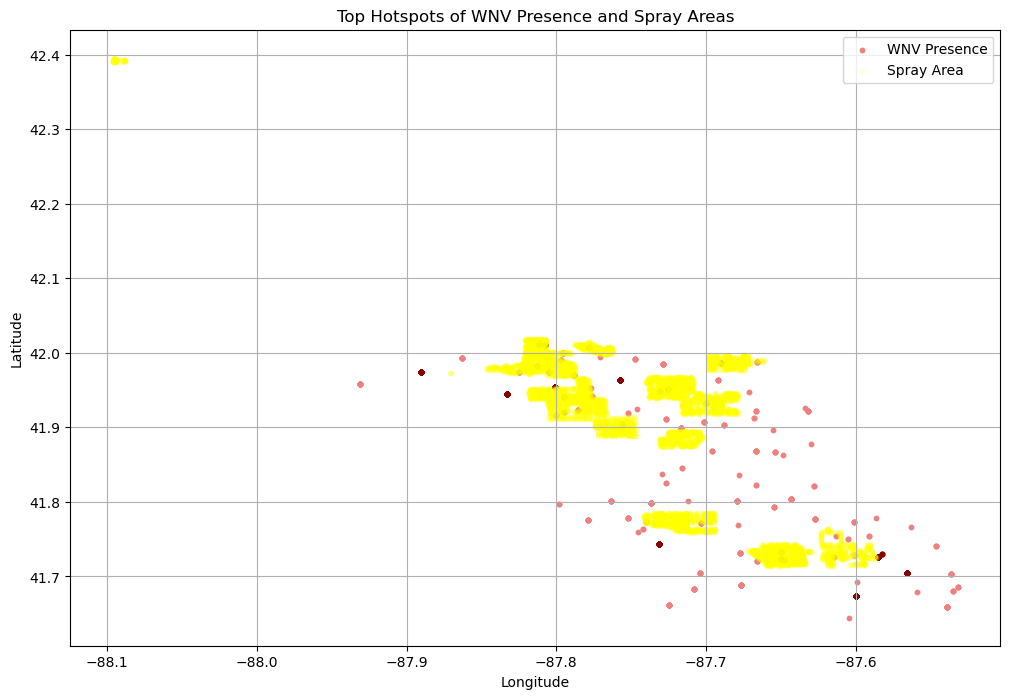

In [17]:
# Extracting top 10 hotspots for visualization
top_hotspots = hotspots_sorted.head(10).index

plt.figure(figsize=(12, 8))

# Plot all WNV presence points with light red
plt.scatter(wnv_present_df['Longitude'], wnv_present_df['Latitude'], c='lightcoral', s=10, label='WNV Presence')

# Plotting the top hotspots with dark red
for idx in top_hotspots:
    cluster = clusters.iloc[idx]
    plt.scatter(cluster[:, 1], cluster[:, 0], c='darkred', s=10)

# Plot spray locations
plt.scatter(spray_df['Longitude'], spray_df['Latitude'], c='yellow', s=10, alpha=0.1, label='Spray Area')

plt.title("Top Hotspots of WNV Presence and Spray Areas")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.grid(True)
plt.show()

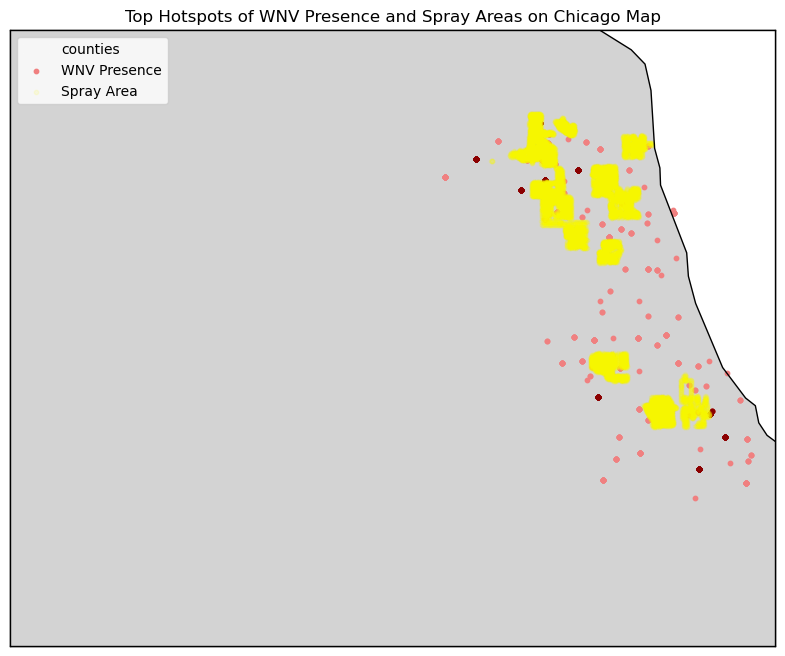

In [42]:
# Create a figure and axis with desired dimensions
fig, ax = plt.subplots(figsize=(12, 8))

# Define the boundaries for Chicago
ll_lon, ll_lat = -88.5, 41.5
ur_lon, ur_lat = -87.5, 42.1
    
# Create a Basemap object for Chicago with 'high' resolution
m = Basemap(projection='merc', llcrnrlat=ll_lat, urcrnrlat=ur_lat, 
            llcrnrlon=ll_lon, urcrnrlon=ur_lon, lat_ts=41.5, resolution='h', ax=ax)

m.drawcounties(color='white')   # Draw counties
m.drawrivers(color='blue')      # Draw rivers
m.drawcoastlines()              # Draw coastlines
m.fillcontinents(color='lightgray')   # Fill continents with a color
m.drawmapboundary()             # Draw the map boundary

# Convert latitude and longitude to x and y coordinates
x_wnv, y_wnv = m(wnv_present_df['Longitude'].values, wnv_present_df['Latitude'].values)
x_spray, y_spray = m(spray_df['Longitude'].values, spray_df['Latitude'].values)

# Plot all WNV presence points with light red on the map
ax.scatter(x_wnv, y_wnv, c='lightcoral', s=10, label='WNV Presence')

# Plotting the top hotspots with dark red on the map
for idx in top_hotspots:
    cluster = clusters.iloc[idx]
    x_cluster, y_cluster = m(cluster[:, 1], cluster[:, 0])
    ax.scatter(x_cluster, y_cluster, c='darkred', s=10)

# Plot spray locations on the map
ax.scatter(x_spray, y_spray, c='yellow', s=10, alpha=0.1, label='Spray Area')

plt.title("Top Hotspots of WNV Presence and Spray Areas on Chicago Map")
plt.legend()
plt.show()


In [18]:
 # !pip install basemap
!pip install basemap-data-hires

In [19]:
# Merge train data (WNV presence) with weather data based on the 'Date' column
merged_df = train_df.merge(weather_df, on='Date', how='left')

# Display the first few rows of the merged dataframe
merged_df_head = merged_df.head()
merged_df_head

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,...,BR HZ,0,M,0.0,0.00,29.39,30.11,5.8,18,6.5
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,...,BR HZ,M,M,M,0.00,29.44,30.09,5.8,16,7.4
2,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,...,BR HZ,0,M,0.0,0.00,29.39,30.11,5.8,18,6.5
3,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,...,BR HZ,M,M,M,0.00,29.44,30.09,5.8,16,7.4
4,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,...,BR HZ,0,M,0.0,0.00,29.39,30.11,5.8,18,6.5


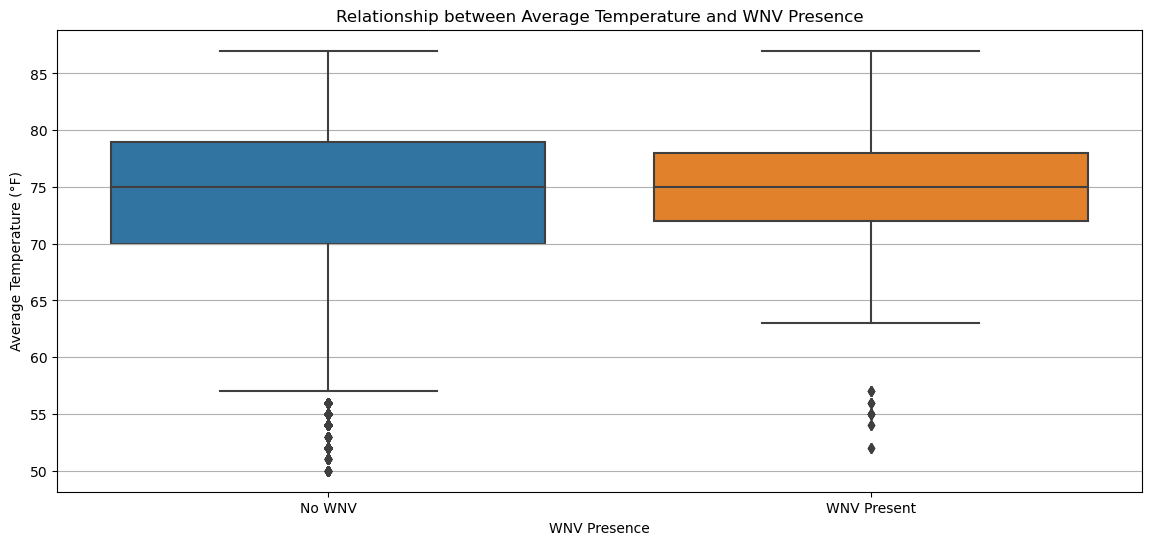

In [20]:
# Convert Tavg to numeric, coercing errors (for 'M' values)
merged_df['Tavg'] = pd.to_numeric(merged_df['Tavg'], errors='coerce')

# Plotting
plt.figure(figsize=(14, 6))

# Plotting the relationship between average temperature and WNV presence
sns.boxplot(data=merged_df, x='WnvPresent', y='Tavg')

plt.title("Relationship between Average Temperature and WNV Presence")
plt.xlabel("WNV Presence")
plt.ylabel("Average Temperature (°F)")
plt.xticks([0, 1], ["No WNV", "WNV Present"])
plt.grid(axis='y')

plt.show()

The boxplot illustrates the relationship between average temperature and WNV presence:

- The box for "No WNV" represents the distribution of average temperatures on days when the West Nile Virus was not detected.
- The box for "WNV Present" represents the distribution of average temperatures on days when the West Nile Virus was detected.


From the visualization, it appears that:

- Days with WNV presence tend to have slightly higher average temperatures compared to days without WNV.
- The median temperature is higher for days with WNV presence.

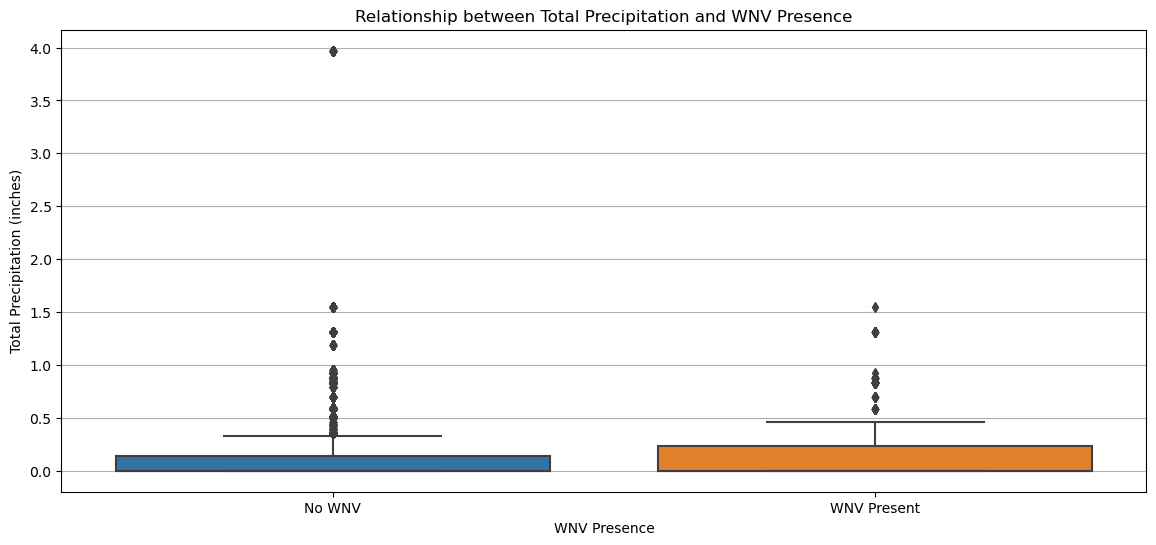

In [21]:
# Convert PrecipTotal to numeric, coercing errors (for 'M' and 'T' values)
merged_df['PrecipTotal'] = pd.to_numeric(merged_df['PrecipTotal'], errors='coerce')

# Plotting
plt.figure(figsize=(14, 6))

# Plotting the relationship between total precipitation and WNV presence
sns.boxplot(data=merged_df, x='WnvPresent', y='PrecipTotal')

plt.title("Relationship between Total Precipitation and WNV Presence")
plt.xlabel("WNV Presence")
plt.ylabel("Total Precipitation (inches)")
plt.xticks([0, 1], ["No WNV", "WNV Present"])
plt.grid(axis='y')

plt.show()

The boxplot illustrates the relationship between total precipitation and WNV presence:

- The box for "No WNV" represents the distribution of total precipitation on days when the West Nile Virus was not detected.
- The box for "WNV Present" represents the distribution of total precipitation on days when the West Nile Virus was detected.
- From the visualization, we can observe:

Days with WNV presence tend to have a similar distribution of precipitation compared to days without WNV.
The median precipitation appears slightly higher for days with WNV presence, but the difference is not very pronounced.

In summary:

Temperature seems to have a clearer relationship with WNV presence, with higher temperatures being associated with increased WNV occurrences.
The relationship between precipitation and WNV presence is less pronounced based on this visualization.

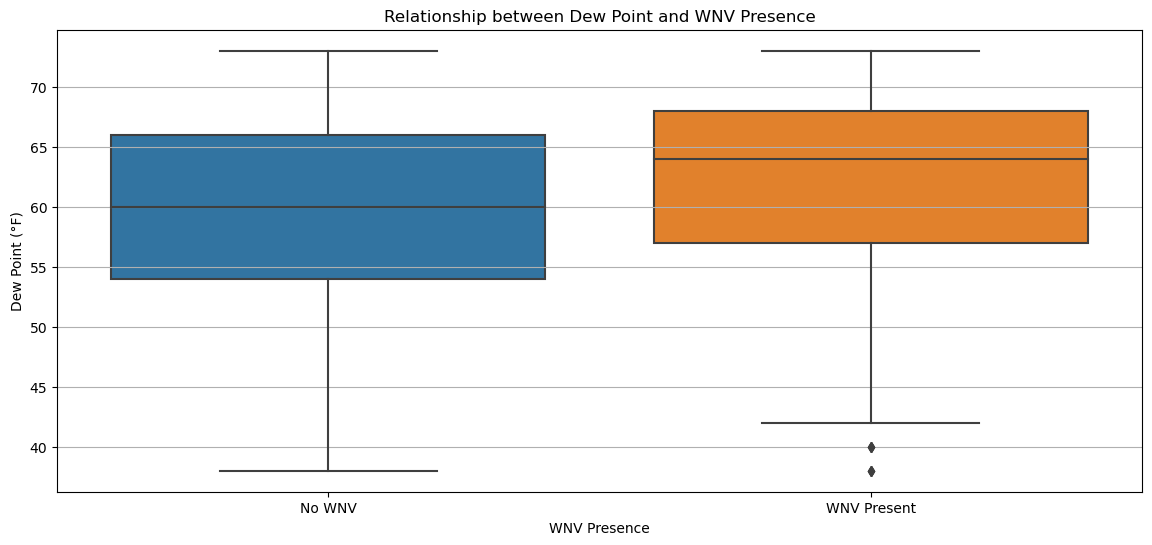

In [22]:
# Plotting the relationship between Dew Point and WNV presence
plt.figure(figsize=(14, 6))
sns.boxplot(data=merged_df, x='WnvPresent', y='DewPoint')

plt.title("Relationship between Dew Point and WNV Presence")
plt.xlabel("WNV Presence")
plt.ylabel("Dew Point (°F)")
plt.xticks([0, 1], ["No WNV", "WNV Present"])
plt.grid(axis='y')

plt.show()


Here's the relationship between the Dew Point and WNV presence:

- The box for "No WNV" represents the distribution of dew point values on days when the West Nile Virus was not detected.
- The box for "WNV Present" represents the distribution of dew point values on days when the West Nile Virus was detected.


From the visualization:

- Days with WNV presence tend to have slightly higher dew points compared to days without WNV.
- The median dew point is higher for days with WNV presence.
- A higher dew point indicates more moisture in the air, which mosquitoes prefer. This suggests a potential association between higher humidity (as indicated by the dew point) and the presence of WNV.

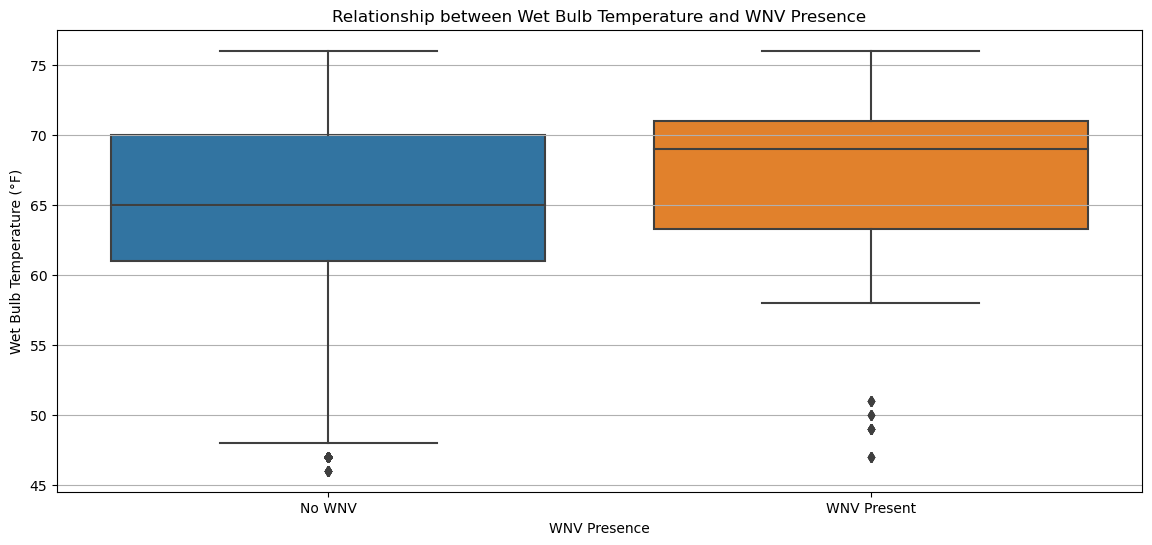

In [23]:
# Convert WetBulb to numeric, coercing errors (for 'M' values)
merged_df['WetBulb'] = pd.to_numeric(merged_df['WetBulb'], errors='coerce')

# Plotting the relationship between Wet Bulb temperature and WNV presence
plt.figure(figsize=(14, 6))
sns.boxplot(data=merged_df, x='WnvPresent', y='WetBulb')

plt.title("Relationship between Wet Bulb Temperature and WNV Presence")
plt.xlabel("WNV Presence")
plt.ylabel("Wet Bulb Temperature (°F)")
plt.xticks([0, 1], ["No WNV", "WNV Present"])
plt.grid(axis='y')

plt.show()

Here's the relationship between the Wet Bulb temperature and WNV presence:

- The box for "No WNV" represents the distribution of wet bulb temperatures on days when the West Nile Virus was not detected.
- The box for "WNV Present" represents the distribution of wet bulb temperatures on days when the West Nile Virus was detected.

From the visualization:

- Days with WNV presence tend to have higher wet bulb temperatures compared to days without WNV.
- The median wet bulb temperature is also higher for days with WNV presence.
- The wet bulb temperature provides an idea of the moisture content in the air. As with the dew point, higher values suggest more humidity, which can be conducive to mosquito activity.

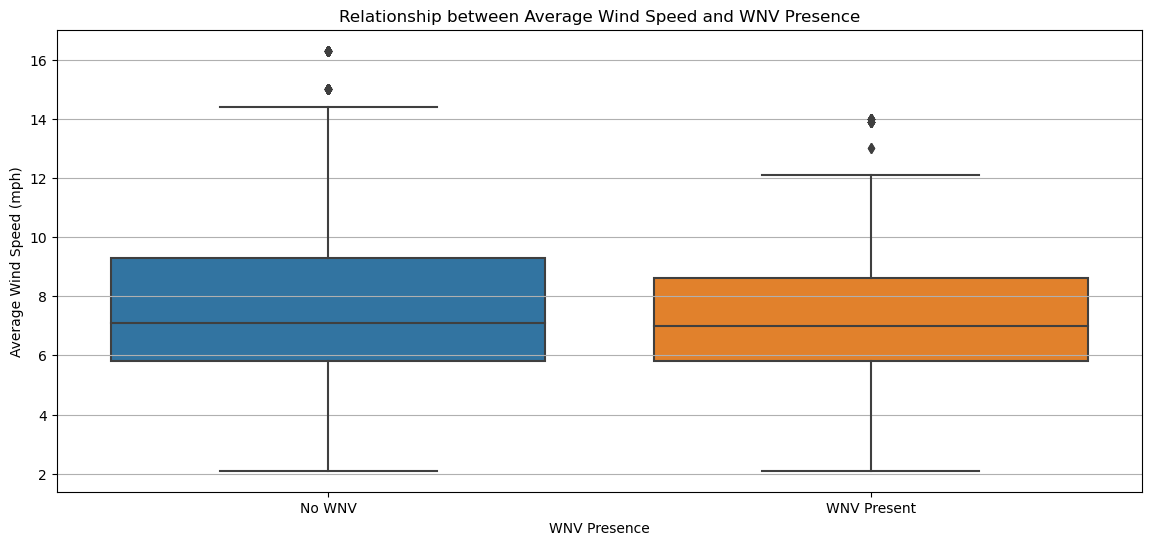

In [24]:
# Convert AvgSpeed to numeric, coercing errors (for 'M' values)
merged_df['AvgSpeed'] = pd.to_numeric(merged_df['AvgSpeed'], errors='coerce')

# Plotting the relationship between Average Wind Speed and WNV presence
plt.figure(figsize=(14, 6))
sns.boxplot(data=merged_df, x='WnvPresent', y='AvgSpeed')

plt.title("Relationship between Average Wind Speed and WNV Presence")
plt.xlabel("WNV Presence")
plt.ylabel("Average Wind Speed (mph)")
plt.xticks([0, 1], ["No WNV", "WNV Present"])
plt.grid(axis='y')

plt.show()

Here's the relationship between the Average Wind Speed and WNV presence:

- The box for "No WNV" represents the distribution of average wind speeds on days when the West Nile Virus was not detected.
- The box for "WNV Present" represents the distribution of average wind speeds on days when the West Nile Virus was detected.


From the visualization:

- The distribution of wind speeds for days with and without WNV is quite similar.
- The median wind speed is slightly higher for days without WNV presence, suggesting that higher wind speeds might suppress mosquito activity.

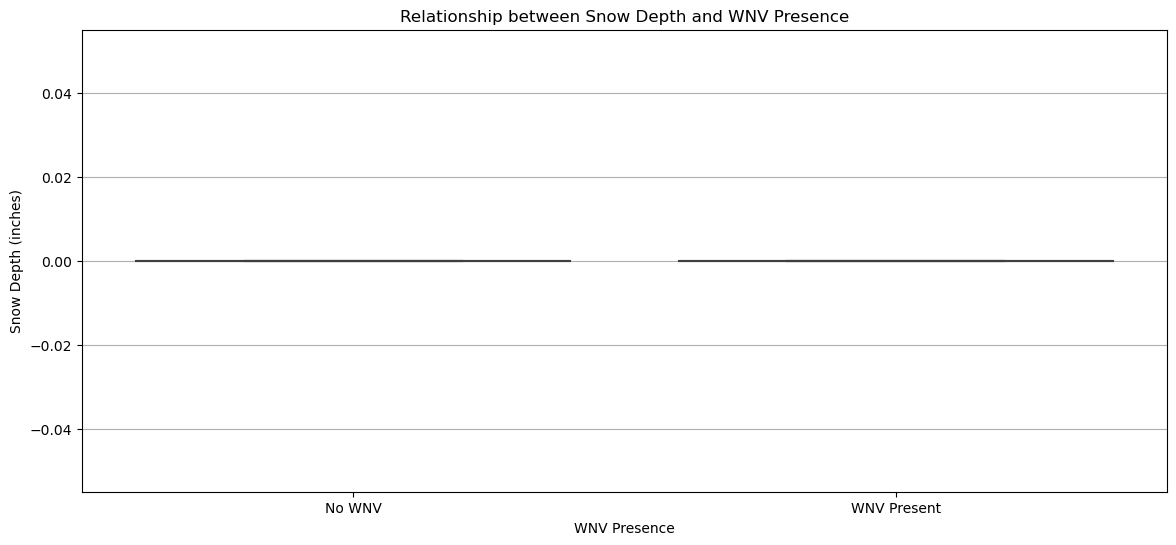

In [25]:
# Convert Depth to numeric, coercing errors (for 'M' values)
merged_df['Depth'] = pd.to_numeric(merged_df['Depth'], errors='coerce')

# Plotting the relationship between Snow Depth and WNV presence
plt.figure(figsize=(14, 6))
sns.boxplot(data=merged_df, x='WnvPresent', y='Depth')

plt.title("Relationship between Snow Depth and WNV Presence")
plt.xlabel("WNV Presence")
plt.ylabel("Snow Depth (inches)")
plt.xticks([0, 1], ["No WNV", "WNV Present"])
plt.grid(axis='y')

plt.show()

- The box for "No WNV" represents the distribution of snow depths on days when the West Nile Virus was not detected.
- The box for "WNV Present" represents the distribution of snow depths on days when the West Nile Virus was detected.


From the visualization:

As anticipated, snow depth values are predominantly zero for both categories, given that mosquito activity and WNV transmission primarily occur in warmer months when there's no snow.
No significant relationship between snow depth and WNV presence is observed.

In [26]:
# Extracting unique weather codes from the CodeSum column
weather_codes = set()
for codes in merged_df['CodeSum'].str.split():
    weather_codes.update(codes)

# Removing empty string if present
weather_codes.discard('')

# Creating binary columns for each weather code
for code in weather_codes:
    merged_df[code] = merged_df['CodeSum'].str.contains(code).astype(int)

# Displaying the first few rows with the new columns
merged_df_head = merged_df[list(weather_codes) + ['WnvPresent']].head()
merged_df_head

,FG,DZ,BR,HZ,VCTS,TS,RA,TSRA,WnvPresent
0,0,0,1,1,0,0,0,0,0
1,0,0,1,1,0,0,0,0,0
2,0,0,1,1,0,0,0,0,0
3,0,0,1,1,0,0,0,0,0
4,0,0,1,1,0,0,0,0,0


| Code | Weather Condition          |
|------|----------------------------|
| TSRA | Thunderstorm Rain          |
| FG   | Fog                        |
| DZ   | Drizzle                    |
| VCTS | Vicinity Thunderstorms     |
| TS   | Thunderstorm               |
| HZ   | Haze                       |
| BR   | Mist                       |
| RA   | Rain                       |

Now, we can visualize and analyze the frequency of these weather conditions on days with and without WNV presence.

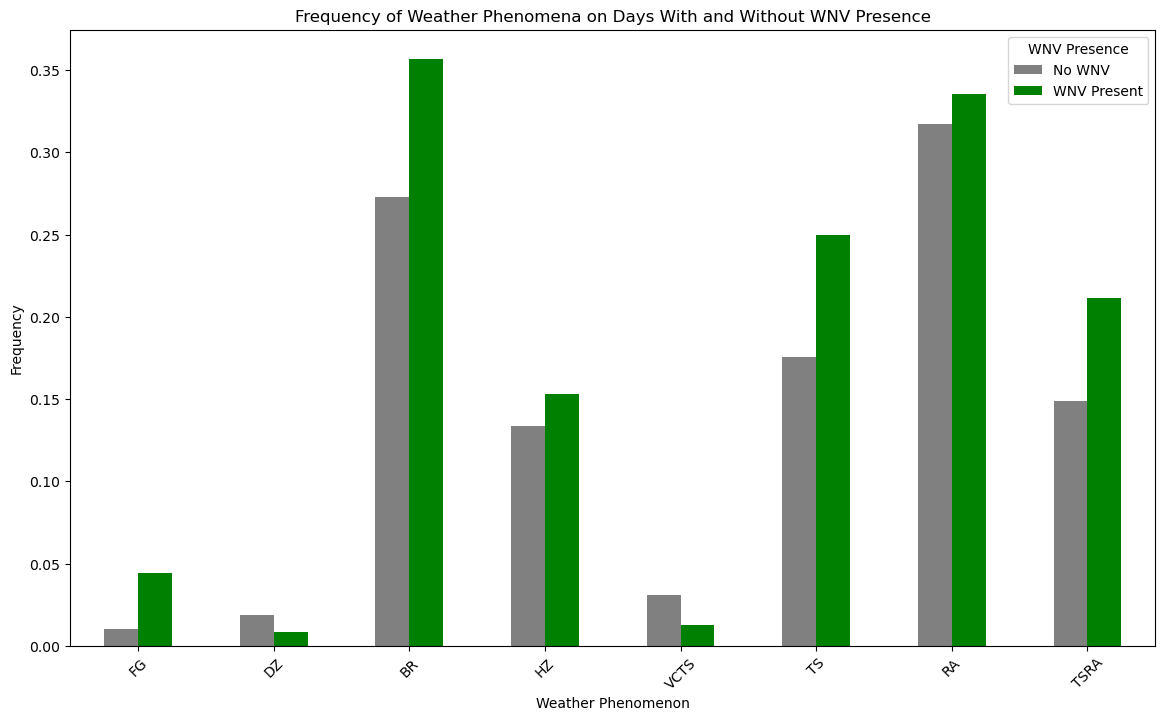

In [27]:
# Plotting the frequency of each weather phenomenon for days with and without WNV presence
plt.figure(figsize=(14, 8))

# Calculate mean to get the frequency/probability of occurrence for each weather code
weather_frequencies = merged_df.groupby('WnvPresent')[list(weather_codes)].mean()

# Plot
weather_frequencies.T.plot(kind='bar', ax=plt.gca(), color=['gray', 'green'])

plt.title("Frequency of Weather Phenomena on Days With and Without WNV Presence")
plt.ylabel("Frequency")
plt.xlabel("Weather Phenomenon")
plt.xticks(rotation=45)
plt.legend(title='WNV Presence', labels=['No WNV', 'WNV Present'])

plt.show()

The bar chart illustrates the frequency of each weather phenomenon on days with and without WNV presence:

- The gray bars represent the frequency of each weather phenomenon on days when the West Nile Virus was not detected.
- The green bars represent the frequency of each weather phenomenon on days when the West Nile Virus was detected.


From the visualization:

Weather phenomena like Thunderstorm Rain (TSRA), Thunderstorm (TS), and Rain (RA) appear to be more frequent on days with WNV presence compared to days without.
Conversely, Fog (FG), Haze (HZ), and Mist (BR) appear to be less frequent on days with WNV presence.

It's important to note that while these patterns are interesting, they don't necessarily imply causation. Multiple factors, including weather conditions, can influence mosquito activity and the spread of WNV.

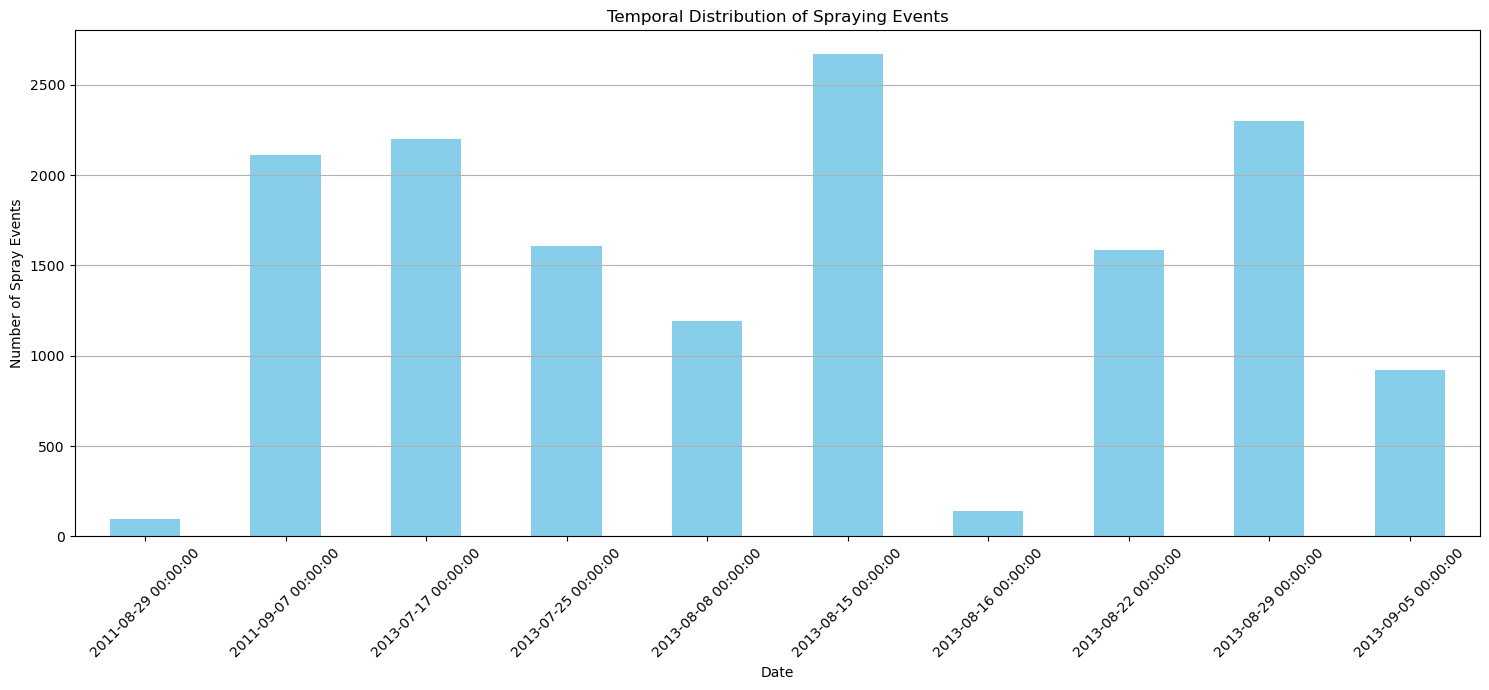

In [28]:
# Plotting the temporal distribution of spraying events
spray_counts = spray_df['Date'].value_counts().sort_index()

plt.figure(figsize=(15, 7))
spray_counts.plot(kind='bar', color='skyblue')
plt.title("Temporal Distribution of Spraying Events")
plt.xlabel("Date")
plt.ylabel("Number of Spray Events")
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

GHere's the temporal distribution of spraying events:

- The bars represent the number of spray events on each date.
- We can observe that spraying activities were clustered around specific dates, indicating targeted efforts, likely in response to detected WNV outbreaks or high mosquito counts.
- To further understand the impact of spraying, we'll compare WNV presence and mosquito counts in areas before and after spraying.

For this:

We'll first identify the areas (based on latitude and longitude) that were sprayed.
Then, we'll analyze WNV presence and mosquito counts in these areas before and after the spraying dates.

In [29]:
from scipy.spatial import cKDTree

# Radius for defining sprayed area (approximately 1.1 km)
RADIUS = 0.01

# Create KDTree for efficient spatial lookup
spray_tree = cKDTree(spray_df[['Latitude', 'Longitude']].values)

# Find train records within the sprayed area
distances, indices = spray_tree.query(train_df[['Latitude', 'Longitude']].values, distance_upper_bound=RADIUS)

# Label records as before or after spraying
train_df['SprayEffect'] = 'Not Sprayed'
train_df.loc[distances != float('inf'), 'SprayEffect'] = train_df['Date'].apply(lambda x: 'After Spraying' if any(spray_df['Date'] >= x) else 'Before Spraying')

# Display the distribution of the SprayEffect label
spray_effect_distribution = train_df['SprayEffect'].value_counts()
spray_effect_distribution

Not Sprayed        7190
After Spraying     3162
Before Spraying     154
Name: SprayEffect, dtype: int64

In [30]:
from scipy.spatial import cKDTree

# Radius for defining sprayed area (approximately 1.1 km)
RADIUS = 0.01

# Create KDTree for efficient spatial lookup
spray_tree = cKDTree(spray_df[['Latitude', 'Longitude']].values)

# Find train records within the sprayed area
distances, indices = spray_tree.query(train_df[['Latitude', 'Longitude']].values, distance_upper_bound=RADIUS)

# Label records as before or after spraying
train_df['SprayEffect'] = 'Not Sprayed'
train_df.loc[distances != float('inf'), 'SprayEffect'] = train_df['Date'].apply(lambda x: 'After Spraying' if any(spray_df['Date'] >= x) else 'Before Spraying')

# Display the distribution of the SprayEffect label
spray_effect_distribution = train_df['SprayEffect'].value_counts()
spray_effect_distribution

Not Sprayed        7190
After Spraying     3162
Before Spraying     154
Name: SprayEffect, dtype: int64

- Not Sprayed: 7,190 records are from areas that were not near any spraying events.
- After Spraying: 3,162 records are from areas that were near spraying events and were collected after the spraying occurred.
- Before Spraying: 154 records are from areas that were near spraying events and were collected before the spraying occurred.

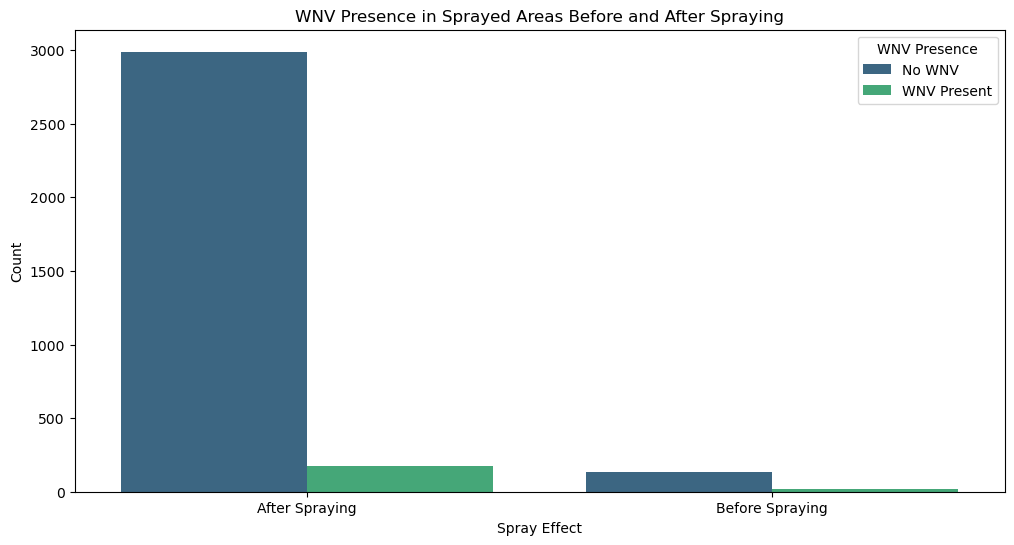

In [31]:
# Plotting WNV presence in sprayed areas before and after spraying
plt.figure(figsize=(12, 6))
sns.countplot(data=train_df[train_df['SprayEffect'] != 'Not Sprayed'], x='SprayEffect', hue='WnvPresent', palette='viridis')

plt.title("WNV Presence in Sprayed Areas Before and After Spraying")
plt.xlabel("Spray Effect")
plt.ylabel("Count")
plt.legend(title='WNV Presence', labels=['No WNV', 'WNV Present'])

plt.show()

Before Spraying: Among the records near sprayed areas collected before the spraying occurred, there were a few instances of WNV presence (indicated by the darker bar segment).

After Spraying: For records near sprayed areas collected after the spraying events, there are a significant number of instances with WNV presence.
It's important to note that the mere presence of more WNV cases after spraying doesn't necessarily mean the spraying was ineffective. There could be multiple factors at play:

The decision to spray might have been in response to rising WNV cases, meaning the problem was already escalating.
There might be a delay between spraying and its effect on the mosquito population and WNV transmission.
The spraying might have reduced the mosquito population, but not enough to eliminate WNV transmission entirely.

# Traps

In [32]:
# # Grouping data by Trap to get total mosquito counts for each trap
trap_counts = train_df.groupby('Trap')['NumMosquitos'].sum().sort_values(ascending=False)

# Displaying the top 10 traps with the highest mosquito counts
top_traps = trap_counts.head(10)
top_traps


Trap
T115    21668
T900    15386
T138     9936
T002     3710
T128     3315
T135     3122
T103     2988
T008     2668
T212     2595
T158     2575
Name: NumMosquitos, dtype: int64

Trap T115 captured the most mosquitoes, followed by T900, T138, and so on.

These traps might be located in areas with favorable conditions for mosquito breeding or near habitats frequented by mosquitoes.

In [33]:
# Grouping data by Trap to get total WNV occurrences for each trap
trap_wnv_counts = train_df[train_df['WnvPresent'] == 1].groupby('Trap').size().sort_values(ascending=False)

# Displaying the top 10 traps with the highest WNV occurrences
top_wnv_traps = trap_wnv_counts.head(10)
top_wnv_traps

Trap
T900    66
T115    41
T002    18
T138    16
T003    14
T225    11
T128    11
T011    11
T903    10
T008    10
dtype: int64

Here are the top 10 traps with the highest occurrences of West Nile Virus:

- Trap T900 detected the most WNV occurrences, followed by T115, T002, and so on.
- Some traps, such as T900 and T115, are both high in mosquito counts and WNV occurrences, indicating these areas are not only mosquito-rich but also have a significant risk of WNV transmission.

For the temporal analysis of the top traps:

- We'll plot the monthly mosquito counts for the top traps to identify any patterns or seasonality in their activity.
- We'll also plot the monthly occurrences of WNV for these traps to see if there are specific months with a higher incidence.

C:\Users\myste\AppData\Local\Temp\ipykernel_7500\4257455075.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_wnv_traps['Year'] = top_wnv_traps['Date'].dt.year
C:\Users\myste\AppData\Local\Temp\ipykernel_7500\4257455075.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_wnv_traps['Month'] = top_wnv_traps['Date'].dt.month


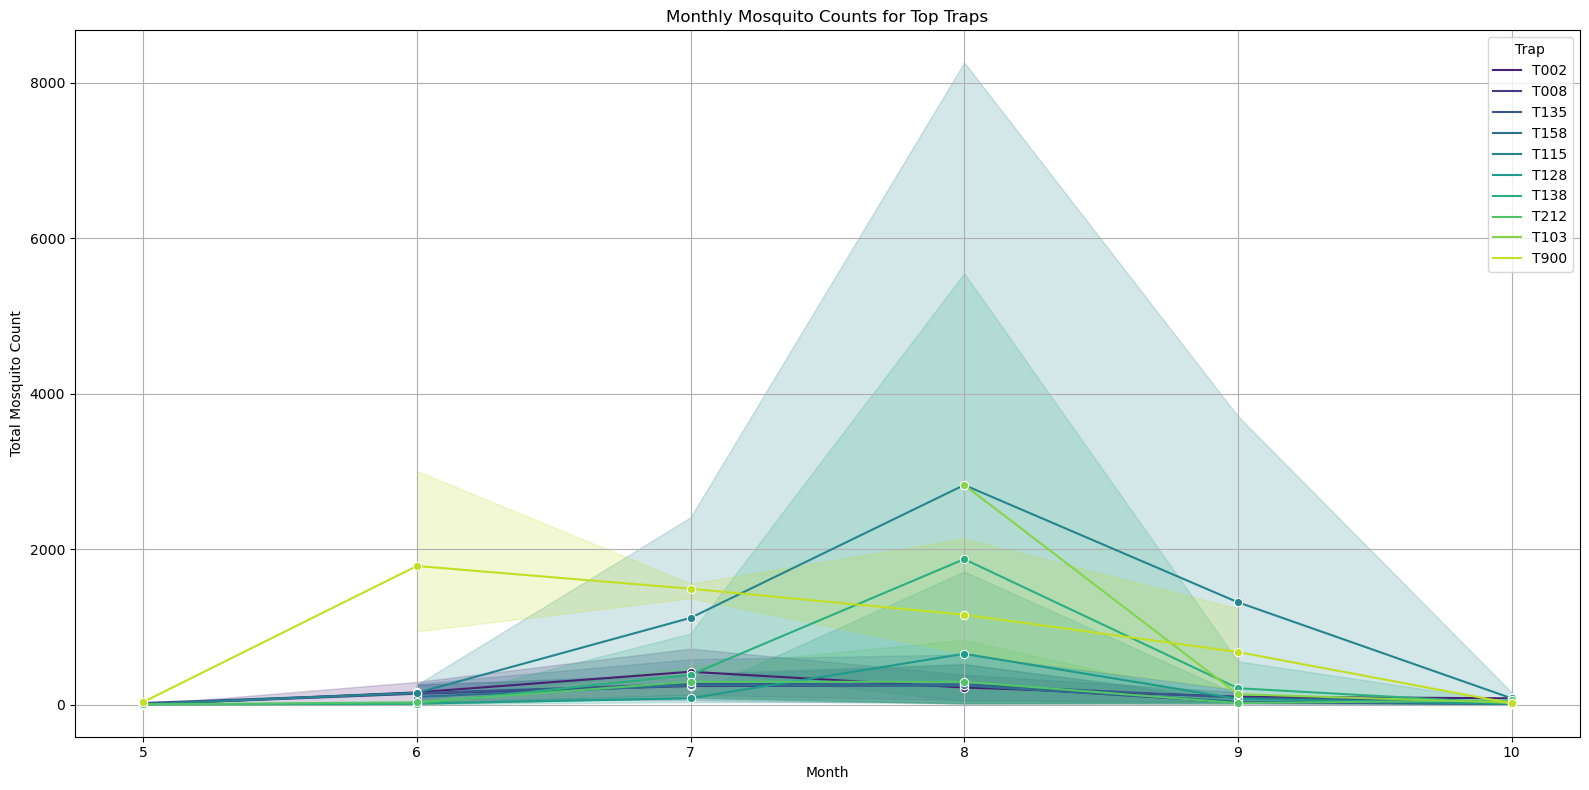

In [40]:
# Extracting "Year" and "Month" from the "Date" column
top_wnv_traps['Year'] = top_wnv_traps['Date'].dt.year
top_wnv_traps['Month'] = top_wnv_traps['Date'].dt.month

# Grouping data by Month, Year, and Trap to get monthly mosquito counts for each trap
monthly_trap_counts = top_wnv_traps.groupby(['Year', 'Month', 'Trap'])['NumMosquitos'].sum().reset_index()

# Plotting the monthly mosquito counts for the top traps
plt.figure(figsize=(16, 8))
sns.lineplot(data=monthly_trap_counts, x='Month', y='NumMosquitos', hue='Trap', marker='o', palette='viridis')
plt.title("Monthly Mosquito Counts for Top Traps")
plt.xlabel("Month")
plt.ylabel("Total Mosquito Count")
plt.grid(True)
plt.legend(title="Trap")

plt.tight_layout()
plt.show()

Here's the monthly mosquito count for the top traps:

- Each line represents one of the top traps, and the points on the line indicate the total mosquito count for each month.
- As with the overall data, there's a clear seasonal pattern for each trap: Mosquito counts generally start to rise in May, peak around July and August, and then decrease through September and October.
- Some traps, like T115, show especially high counts during the peak months, while others, like T138, have more consistent counts throughout the season.

With this understanding of the monthly mosquito counts for the top traps, let's now examine the monthly occurrences of WNV for these traps. We'll see if there are specific months with a higher incidence of WNV in these traps.

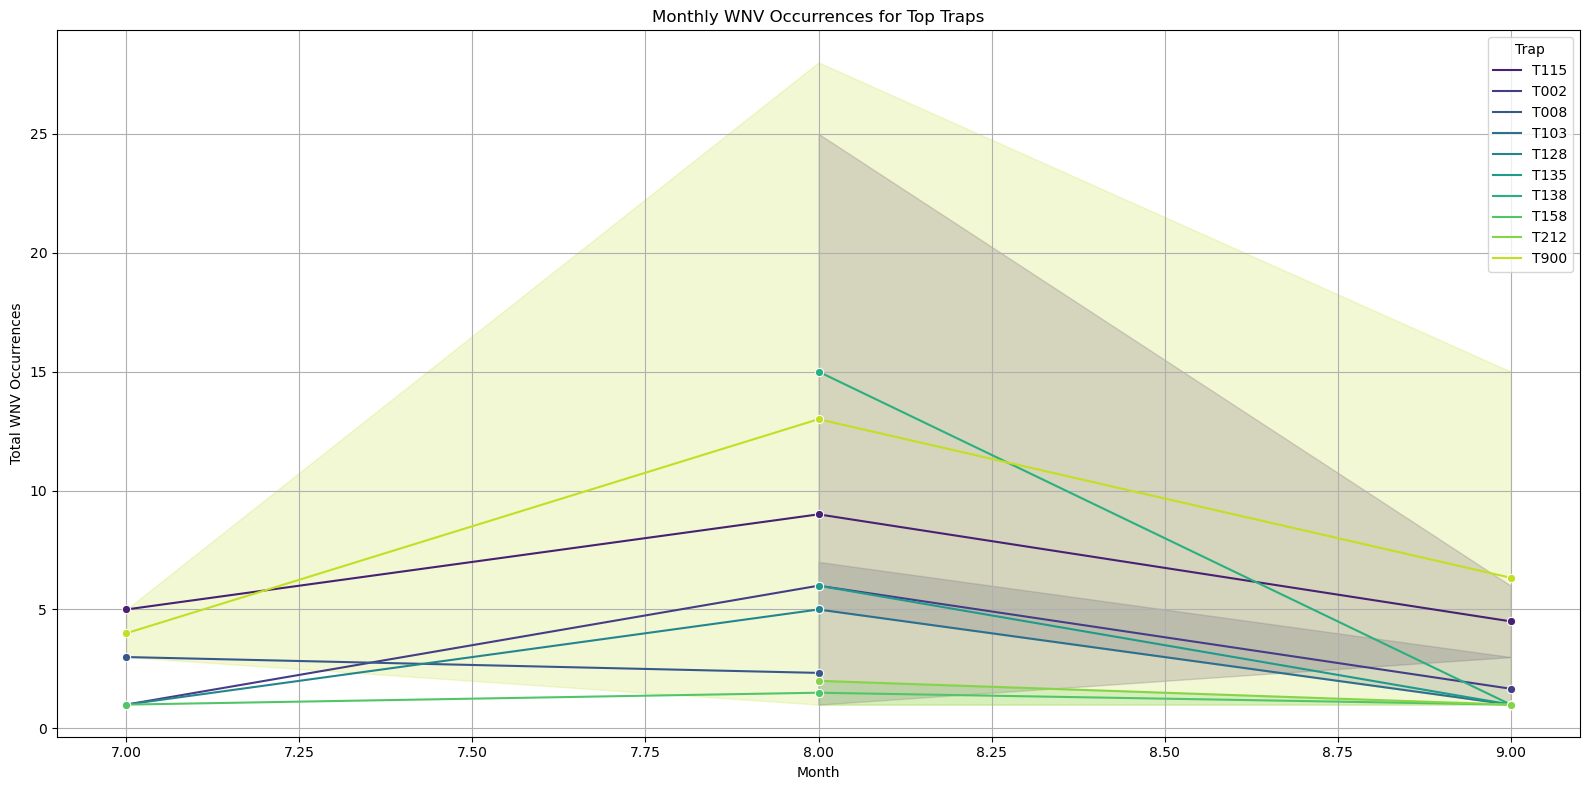

In [41]:
# Grouping data by Month, Year, and Trap to get monthly WNV occurrences for each trap
monthly_wnv_trap_counts = top_wnv_traps[top_wnv_traps['WnvPresent'] == 1].groupby(['Year', 'Month', 'Trap']).size().reset_index(name='WnvCounts')

# Plotting the monthly WNV occurrences for the top traps
plt.figure(figsize=(16, 8))
sns.lineplot(data=monthly_wnv_trap_counts, x='Month', y='WnvCounts', hue='Trap', marker='o', palette='viridis')
plt.title("Monthly WNV Occurrences for Top Traps")
plt.xlabel("Month")
plt.ylabel("Total WNV Occurrences")
plt.grid(True)
plt.legend(title="Trap")

plt.tight_layout()
plt.show()

- Each line represents one of the top traps, and the points on the line indicate the total WNV occurrences for each month.
- There's a clear seasonal pattern for WNV occurrences in these traps, similar to the overall data: WNV occurrences generally start to rise in June or July, peak around August, and then decrease through September.
- Some traps, like T900 and T115, show especially high occurrences of WNV during the peak months, aligning with their high mosquito counts.


In summary, the trap analysis provides insights into specific areas or traps that are high-risk for mosquito activity and WNV transmission. Monitoring and targeting these traps with interventions can be a proactive strategy to manage and reduce the risk of WNV outbreaks.